In [3]:
import sys
sys.path.append('C:/Users/aochen/Desktop/AudioDL_project')

In [4]:
import torch
from torch.utils.data import DataLoader
from utils.dataset import AECChallengeDataset
import matplotlib.pyplot as plt
import numpy as np
import os

def test_dataset_basic():
    """Test basic dataset functionality"""
    print("=" * 60)
    print("TESTING DATASET BASIC FUNCTIONALITY")
    print("=" * 60)
    
    try:
        # Create dataset
        data_dir = 'AEC-Challenge/datasets/synthetic'
        dataset = AECChallengeDataset(data_dir, segment_length=8000, mode='train')
        
        print(f"✓ Dataset created successfully")
        print(f"  - Number of samples: {len(dataset)}")
        print(f"  - Data directory: {dataset.data_dir}")
        print(f"  - Segment length: {dataset.segment_length}")
        print(f"  - Sample rate: {dataset.sample_rate}")
        
        return dataset
    except Exception as e:
        print(f"✗ Dataset creation failed: {e}")
        return None


STARTING COMPLETE DATASET TEST
TESTING DATASET BASIC FUNCTIONALITY
✓ Dataset created successfully
  - Number of samples: 10000
  - Data directory: AEC-Challenge/datasets/synthetic
  - Segment length: 8000
  - Sample rate: 16000
TESTING SINGLE SAMPLE FROM DATASET
✓ Sample 80 loaded successfully
  - Mic signal shape: torch.Size([8000, 1])
  - Farend signal shape: torch.Size([8000, 1])
  - Clean signal shape: torch.Size([8000, 1])
  - Data types: torch.float32

Signal Properties:
  - Mic signal range: [-0.5187, 0.5854]
  - Clean signal range: [-0.4492, 0.4814]
  - Farend signal range: [-0.2804, 0.7917]
✓ Mic signal is clean (no NaN)
✓ Mic signal is finite

Statistics:
  - Mic signal mean: -0.005023, std: 0.134351
  - Clean signal mean: -0.000384, std: 0.147957
  - Farend signal mean: -0.000430, std: 0.095090
VISUALIZING SAMPLE


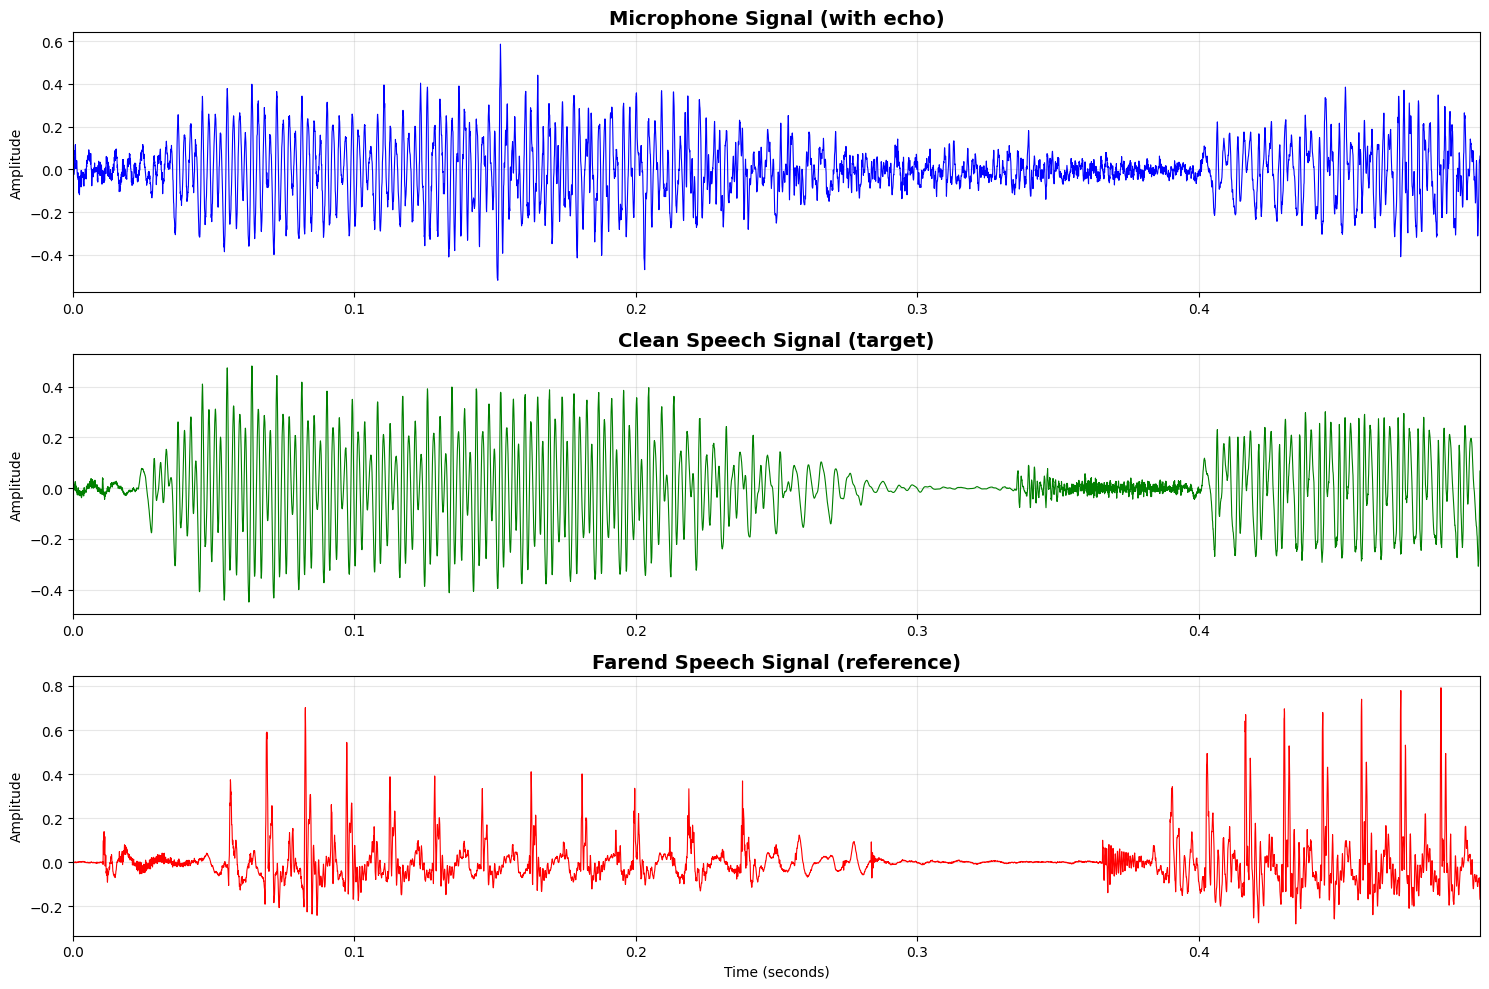

✓ Sample visualization saved to 'plots/sample_signals.png'
COMPARING MIC VS CLEAN SIGNALS


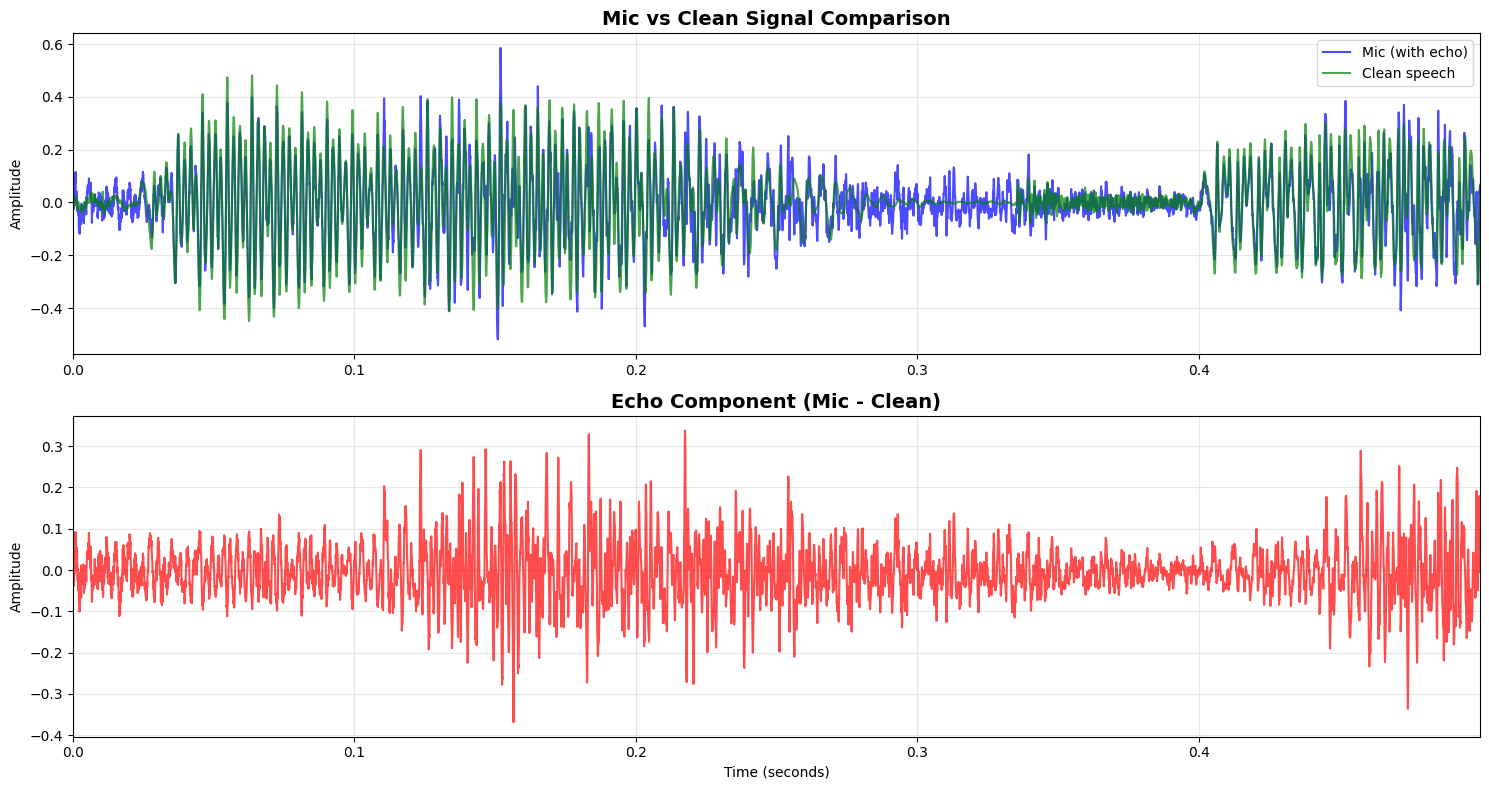

✓ Signal comparison completed
  - Echo energy: 0.005016
  - Clean signal energy: 0.021891
  - Echo-to-Signal Ratio: -6.40 dB

✓ ALL TESTS COMPLETED SUCCESSFULLY!
Check the 'plots' folder for visualizations


In [6]:
# Add this to your test.ipynb

def test_single_sample(dataset):
    """Test loading and analyzing a single sample from the dataset"""
    print("=" * 60)
    print("TESTING SINGLE SAMPLE FROM DATASET")
    print("=" * 60)
    
    if dataset is None:
        print("✗ Dataset is None, cannot test sample")
        return None
    
    try:
        # Pick the first sample
        sample_idx = 80
        mic_signal, farend_signal, clean_signal = dataset[sample_idx]
        
        print(f"✓ Sample {sample_idx} loaded successfully")
        print(f"  - Mic signal shape: {mic_signal.shape}")
        print(f"  - Farend signal shape: {farend_signal.shape}")
        print(f"  - Clean signal shape: {clean_signal.shape}")
        print(f"  - Data types: {mic_signal.dtype}")
        
        # Convert to numpy for analysis
        mic_np = mic_signal.squeeze().numpy()
        farend_np = farend_signal.squeeze().numpy()
        clean_np = clean_signal.squeeze().numpy()
        
        # Check data properties
        print(f"\nSignal Properties:")
        print(f"  - Mic signal range: [{mic_np.min():.4f}, {mic_np.max():.4f}]")
        print(f"  - Clean signal range: [{clean_np.min():.4f}, {clean_np.max():.4f}]")
        print(f"  - Farend signal range: [{farend_np.min():.4f}, {farend_np.max():.4f}]")
        
        # Check for issues
        if np.isnan(mic_np).any():
            print("✗ Mic signal contains NaN values")
        else:
            print("✓ Mic signal is clean (no NaN)")
            
        if np.isinf(mic_np).any():
            print("✗ Mic signal contains Inf values")
        else:
            print("✓ Mic signal is finite")
        
        # Calculate basic statistics
        print(f"\nStatistics:")
        print(f"  - Mic signal mean: {mic_np.mean():.6f}, std: {mic_np.std():.6f}")
        print(f"  - Clean signal mean: {clean_np.mean():.6f}, std: {clean_np.std():.6f}")
        print(f"  - Farend signal mean: {farend_np.mean():.6f}, std: {farend_np.std():.6f}")
        
        return mic_signal, farend_signal, clean_signal
        
    except Exception as e:
        print(f"✗ Failed to load sample {sample_idx}: {e}")
        return None

def visualize_sample(mic_signal, farend_signal, clean_signal):
    """Visualize the three signals"""
    print("=" * 60)
    print("VISUALIZING SAMPLE")
    print("=" * 60)
    
    if mic_signal is None:
        print("✗ No signals to visualize")
        return
    
    try:
        # Convert to numpy
        mic_np = mic_signal.squeeze().numpy()
        farend_np = farend_signal.squeeze().numpy()
        clean_np = clean_signal.squeeze().numpy()
        
        # Create time axis (assuming 16kHz sample rate)
        time = np.arange(len(mic_np)) / 16000
        
        # Create the plot
        plt.figure(figsize=(15, 10))
        
        # Plot microphone signal
        plt.subplot(3, 1, 1)
        plt.plot(time, mic_np, 'b-', linewidth=0.8)
        plt.title('Microphone Signal (with echo)', fontsize=14, fontweight='bold')
        plt.ylabel('Amplitude')
        plt.grid(True, alpha=0.3)
        plt.xlim(0, time[-1])
        
        # Plot clean speech signal
        plt.subplot(3, 1, 2)
        plt.plot(time, clean_np, 'g-', linewidth=0.8)
        plt.title('Clean Speech Signal (target)', fontsize=14, fontweight='bold')
        plt.ylabel('Amplitude')
        plt.grid(True, alpha=0.3)
        plt.xlim(0, time[-1])
        
        # Plot farend speech signal
        plt.subplot(3, 1, 3)
        plt.plot(time, farend_np, 'r-', linewidth=0.8)
        plt.title('Farend Speech Signal (reference)', fontsize=14, fontweight='bold')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Amplitude')
        plt.grid(True, alpha=0.3)
        plt.xlim(0, time[-1])
        
        plt.tight_layout()
        
        # Save the plot
        # os.makedirs('plots', exist_ok=True)
        # plt.savefig('plots/sample_signals.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        print("✓ Sample visualization saved to 'plots/sample_signals.png'")
        
    except Exception as e:
        print(f"✗ Visualization failed: {e}")

def compare_signals(mic_signal, clean_signal):
    """Compare mic and clean signals to see the echo effect"""
    print("=" * 60)
    print("COMPARING MIC VS CLEAN SIGNALS")
    print("=" * 60)
    
    try:
        mic_np = mic_signal.squeeze().numpy()
        clean_np = clean_signal.squeeze().numpy()
        
        # Calculate difference (this should show the echo component)
        echo_component = mic_np - clean_np
        
        # Create comparison plot
        time = np.arange(len(mic_np)) / 16000
        
        plt.figure(figsize=(15, 8))
        
        plt.subplot(2, 1, 1)
        plt.plot(time, mic_np, 'b-', label='Mic (with echo)', alpha=0.7)
        plt.plot(time, clean_np, 'g-', label='Clean speech', alpha=0.7)
        plt.title('Mic vs Clean Signal Comparison', fontsize=14, fontweight='bold')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xlim(0, time[-1])
        
        plt.subplot(2, 1, 2)
        plt.plot(time, echo_component, 'r-', alpha=0.7)
        plt.title('Echo Component (Mic - Clean)', fontsize=14, fontweight='bold')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Amplitude')
        plt.grid(True, alpha=0.3)
        plt.xlim(0, time[-1])
        
        plt.tight_layout()
        # plt.savefig('plots/signal_comparison.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        # Calculate metrics
        echo_energy = np.mean(echo_component**2)
        clean_energy = np.mean(clean_np**2)
        echo_to_signal_ratio = 10 * np.log10(echo_energy / (clean_energy + 1e-10))
        
        print(f"✓ Signal comparison completed")
        print(f"  - Echo energy: {echo_energy:.6f}")
        print(f"  - Clean signal energy: {clean_energy:.6f}")
        print(f"  - Echo-to-Signal Ratio: {echo_to_signal_ratio:.2f} dB")
        
    except Exception as e:
        print(f"✗ Signal comparison failed: {e}")

# Main test function
def run_complete_test():
    """Run complete dataset test"""
    print("STARTING COMPLETE DATASET TEST")
    print("=" * 80)
    
    # Test 1: Create dataset
    dataset = test_dataset_basic()
    
    if dataset is not None:
        # Test 2: Load single sample
        signals = test_single_sample(dataset)
        
        if signals is not None:
            mic_signal, farend_signal, clean_signal = signals
            
            # Test 3: Visualize signals
            visualize_sample(mic_signal, farend_signal, clean_signal)
            
            # Test 4: Compare signals
            compare_signals(mic_signal, clean_signal)
            
            print("\n" + "=" * 80)
            print("✓ ALL TESTS COMPLETED SUCCESSFULLY!")
            print("Check the 'plots' folder for visualizations")
        else:
            print("✗ Could not load sample from dataset")
    else:
        print("✗ Could not create dataset")

# Run the test
run_complete_test()